# Preliminaries #

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

In [2]:
# Check out the styles
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
# Set the style
%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.style.use('bmh')

## Business Dataset Analysis ##

In [4]:
# Import business dataset
business_json_path = 'business.json'
df_b = pd.read_json(business_json_path, lines=True)

# Display the dataframe
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### Opened Businesses ###

<AxesSubplot: xlabel='is_open', ylabel='count'>

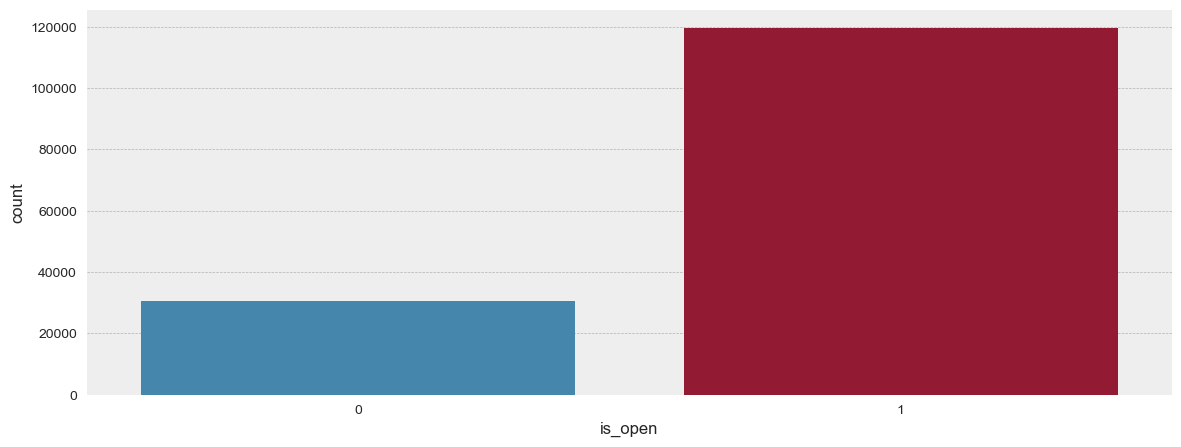

In [5]:
# Show the distribtuion of open vs closed establishments
plt.figure(figsize=(14,5))
sns.countplot(data = df_b, x = 'is_open')

### Business Categories ###

In [6]:
# Explore the categories
df_explode = df_b.assign(categories = df_b.categories
                         .str.split(', ')).explode('categories')

In [7]:
print("Total number of categories: ", len(df_explode.categories.value_counts()))
print("Top 30 categories: ")

df_explode.categories.value_counts()[:30]

Total number of categories:  1311
Top 30 categories: 


Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Home & Garden                 5799
Fashion                       5739
Burgers                       5636
Arts & Entertainment          5434
Auto Repair                   5433
Hair Salons                   5046
Nail Salons                   4621
Mexican                       4600
Italian             

In [8]:
# Finding categories that contain "Fast Food" but not "Food" for examintaion
df_explode[df_explode.categories.str.contains('Food',
                      case=True,na=False)].categories.value_counts()

Food                      27781
Fast Food                  6472
Specialty Food             4233
Food Trucks                1273
Food Delivery Services     1050
Comfort Food                746
Ethnic Food                 658
Soul Food                   539
Food Stands                 423
Imported Food               201
Do-It-Yourself Food         145
Food Court                  130
Live/Raw Food                88
Food Tours                   62
Food Banks                   12
Name: categories, dtype: int64

### Database Cleaning ###

In [9]:
# Forming a database with Restaurants only
df_exclusive = df_b.loc[df_b['categories'].str.contains('Restaurants', regex=True, na = False, case=True)]
df_exclusive.shape

(52268, 14)

In [10]:
# Drop irrelevant for the project columns
drop_columns = ['hours','is_open', "address", "city", "state", "postal_code", "attributes"]

# df_b = df_b.drop(drop_columns, axis=1)
df_exclusive = df_exclusive.drop(drop_columns, axis=1)

# Check the size
print(df_b.shape, df_exclusive.shape)

(150346, 14) (52268, 7)


In [11]:
# Check the dataframe
df_exclusive.head()

,business_id,name,latitude,longitude,stars,review_count,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,36.269593,-87.058943,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,38.565165,-90.321087,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,36.208102,-86.768170,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,27.955269,-82.456320,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"


### Visualizations ###

Text(0.5, 1.0, 'Distribution of rating in Restaurants')

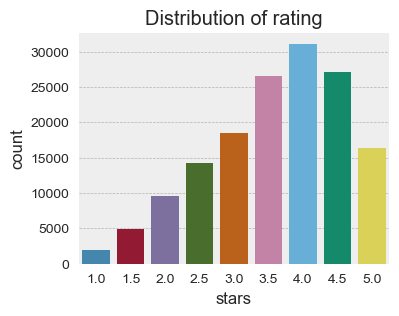

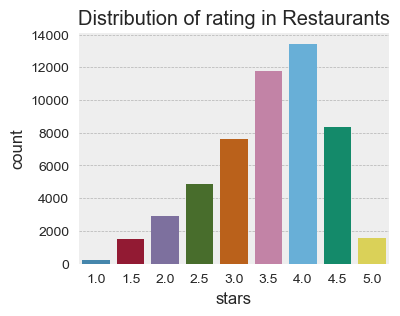

In [13]:
# Distribution of "stars" ratings in all businesses
plt.figure(figsize=(4,3))
ax = sns.countplot(data = df_b, x = 'stars')
plt.title('Distribution of rating')

# Distribution of "stars" ratings in Restaurants
plt.figure(figsize=(4,3))
ax = sns.countplot(data = df_exclusive, x = 'stars')
plt.title('Distribution of rating in Restaurants')

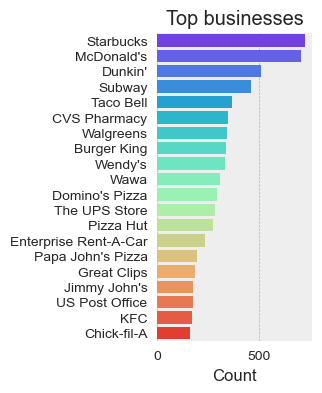

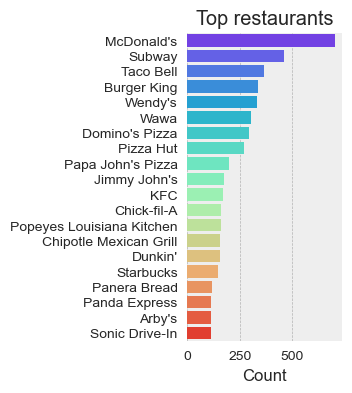

In [15]:
# Extracting the names of establishments 
plt.figure(figsize=(2,4))
cnt = df_b['name'].value_counts()[:20].to_frame()
cnt_restaurants = df_exclusive['name'].value_counts()[:20].to_frame()

# Plot all businesses' names distribution 
ax = sns.barplot(data = cnt, y = cnt.index, x = 'name', palette = 'rainbow', errorbar = None, orient = 'h')
plt.xlabel('Count')
plt.title('Top businesses');

# Plot all restarurants' names distribution
plt.figure(figsize=(2,4))
ax = sns.barplot(data = cnt_restaurants, y = cnt_restaurants.index, x = 'name', palette = 'rainbow', errorbar = None, orient = 'h')
plt.xlabel('Count')
plt.title('Top restaurants');

Number of cities:  1416


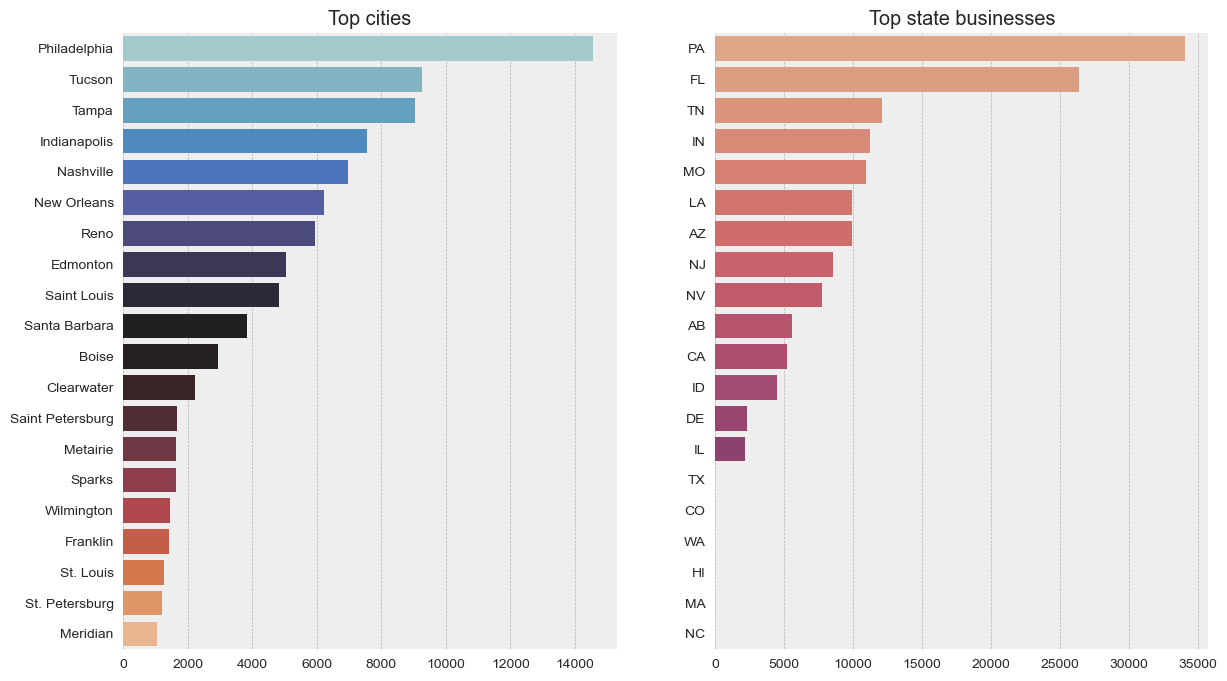

In [16]:
# Explore locations of all businesses

# Cities
print('Number of cities: ', df_b['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = df_b['city'].value_counts()[:20].to_frame()

sns.barplot(data = cnt, y = cnt.index, x = 'city', palette = 'icefire', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top cities')


# States
cnt = df_b['state'].value_counts()[:20].to_frame()

sns.barplot(data = cnt, y = cnt.index, x = 'state', palette = 'flare', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state businesses')

plt.show()

#### Mapping ####

Text(0.5, 1.0, 'North America Businesses')

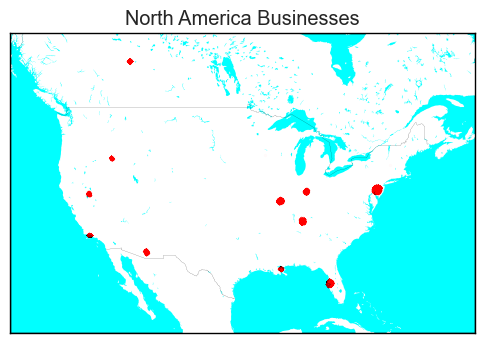

In [19]:
# All businesses
# Sample it down to only the North America (US and Canada) region 
lon_min, lon_max = -132, -60
lat_min, lat_max = 21, 56

# Restrictor
idx_NA = (df_b["longitude"]>lon_min) &\
            (df_b["longitude"]<lon_max) &\
            (df_b["latitude"]>lat_min) &\
            (df_b["latitude"]<lat_max)

# Create a restricted dataframe
NA_business=df_b[idx_NA]

# Init the map
plt.figure(figsize=(6,4))
m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=45,
             resolution='i')

m.fillcontinents(color='#FFF',lake_color='aqua') # white land, aqua lakes
m.drawmapboundary(fill_color='aqua')             # aqua background
m.drawcountries(linewidth=0.1, color="black")    # black line for country borders

# Plotting
mxy = m(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s = 3, c="red", lw=1, alpha=0.01, zorder=5)

plt.title("North America Businesses")

Text(0.5, 1.0, 'North America Restaurants')

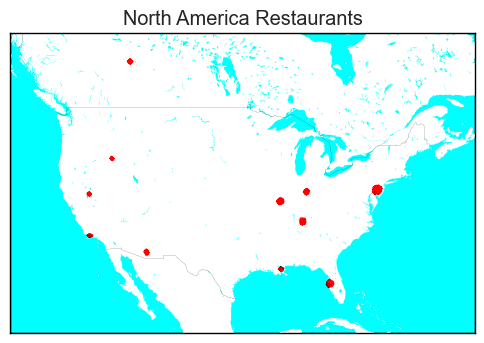

In [20]:
# Restaurants
# Sample it down to only the North America (US and Canada) region 
lon_min, lon_max = -132, -60
lat_min, lat_max = 21, 56

# Restrictor
idx_NA = (df_exclusive["longitude"]>lon_min) &\
            (df_exclusive["longitude"]<lon_max) &\
            (df_exclusive["latitude"]>lat_min) &\
            (df_exclusive["latitude"]<lat_max)

# Create a restricted dataframe
NA_restaurant=df_exclusive[idx_NA]

# Init the map
plt.figure(figsize=(6,4))
m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=45,
             resolution='i')

m.fillcontinents(color='#FFF',lake_color='aqua') # white land, aqua lakes
m.drawmapboundary(fill_color='aqua')             # aqua background
m.drawcountries(linewidth=0.1, color="black")    # black line for country borders

# Plotting
mxy = m(NA_restaurant["longitude"].tolist(), NA_restaurant["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s = 3, c="red", lw=1, alpha=0.01, zorder=5)

plt.title("North America Restaurants")

## Reviews Dataset Analysis ##

In [21]:
review_json_path = 'review.json'

# Loading by chunks due to the large size
size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [23]:
chunk_list = []

for chunk_review in review:
    # Drop columns
    chunk_review = chunk_review.drop(['review_id', 'useful','funny','cool'], axis=1)
    
    # Renaming "stars" column to avoid conflict with business star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    
    # Ensuring all the reviews are tied to aexisting within dataset buisness
    chunk_merged = pd.merge(df_exclusive, chunk_review, on='business_id', how='inner')
    
    # Track progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
    
# Merge into single dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

677953 out of 1,000,000 related reviews
669030 out of 1,000,000 related reviews
667437 out of 1,000,000 related reviews
672860 out of 1,000,000 related reviews
690238 out of 1,000,000 related reviews
657452 out of 1,000,000 related reviews


In [24]:
# Check the size
df.shape

(4034970, 11)

In [25]:
# Check the dataset
df.head(10)

,business_id,name,latitude,longitude,stars,review_count,categories,user_id,review_stars,text,date
0,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",jBzITjfkC7M99oN6a5HErQ,4,We'd been playing a festival in Western Indian...,2017-09-18 17:29:03
1,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",R9AkporqiO758oEz_g9kxQ,3,"The experience happened on Tuesday, July 3rd, ...",2018-07-04 01:02:30
2,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",-Z97B_kIy1-w3nifW1PQZg,5,Phe-nom-nom-nom-enal! Took my wife here today ...,2016-10-13 02:00:28
3,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",9m9mkjkyo4HGFUWgugewHA,5,"Carne Asada tacos were good, hubby had chicken...",2016-07-12 15:05:25
4,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",KE2en6iTCiCtqVS9hq50sg,5,Delicious food. Very generous portions. Very...,2018-07-03 23:28:02
5,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",JmXOZ16ihRlbBmJPhmm3tg,2,Came here for lunch because I was craving faji...,2017-09-30 21:10:05
6,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",6rSKNCq04Y_TEjLIZn3dbA,3,Food here is decent but over priced for Mexica...,2016-10-11 12:13:38
7,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",QAHGreB0NSksC0eEBRzA7g,4,Good mexican food and prices are not bad eithe...,2019-02-21 00:05:50
8,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",TqBujXeU6JR89ENckkBWtw,1,Worst place ever!!!!! If I could rate this pla...,2017-11-27 18:29:48
9,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,39.867338,-86.390529,3.5,112,"Restaurants, Mexican",UMRasW11NiwzLIw4AS3PzQ,2,I'm so disappointed. It's only been a few mont...,2019-07-27 22:55:29


In [ ]:
# Save into CSV
csv_name = "yelp_reviews_restaurants.csv"
df.to_csv(csv_name, index=False)

### Some visualizations ###

Text(0.5, 1.0, 'Distribution of review ratings')

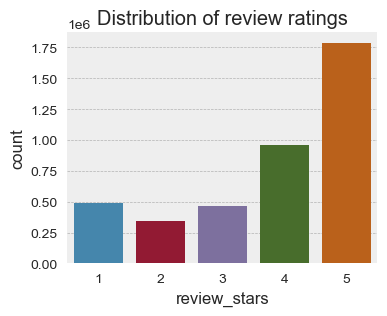

In [26]:
# Review ratings distribution
plt.figure(figsize=(4,3))
ax = sns.countplot(data = df, x = 'review_stars')
plt.title('Distribution of review ratings')

In [27]:
# Analyze correlation between business and review ratings

# Define the sample working size
sample_size = 500000

# Calculate the probabilities for each combination of "stars" and "review_stars"
probs = (df.groupby(["stars", "review_stars"]).size() / len(df)).reset_index(name="prob")

print(probs)

    stars  review_stars      prob
0     1.0             1  0.000692
1     1.0             2  0.000052
2     1.0             3  0.000013
3     1.0             4  0.000006
4     1.0             5  0.000006
5     1.5             1  0.005753
6     1.5             2  0.000793
7     1.5             3  0.000464
8     1.5             4  0.000343
9     1.5             5  0.000381
10    2.0             1  0.009898
11    2.0             2  0.002589
12    2.0             3  0.001812
13    2.0             4  0.001699
14    2.0             5  0.001709
15    2.5             1  0.016050
16    2.5             2  0.007393
17    2.5             3  0.006315
18    2.5             4  0.006818
19    2.5             5  0.006311
20    3.0             1  0.022227
21    3.0             2  0.014188
22    3.0             3  0.015204
23    3.0             4  0.020577
24    3.0             5  0.020906
25    3.5             1  0.030933
26    3.5             2  0.025528
27    3.5             3  0.033024
28    3.5     

In [28]:
# Merge the probablities
df_probs = pd.merge(df, probs, on=["stars", "review_stars"], how="left")

# Normalize the probabilities so that they sum to 1
df_probs["prob"] = df_probs["prob"] / df_probs["prob"].sum()

In [29]:
# Sample from the dataframe using the calculated joint probabilities
sample = df_probs.sample(n=sample_size, weights=df_probs["prob"], replace=False)
sample.head()

,business_id,name,latitude,longitude,stars,review_count,categories,user_id,review_stars,text,date,prob
689716,mRpk0A4u0hnF0lNe1h4hGg,Bearcat Cafe,29.935642,-90.104124,4.5,886,"Coffee & Tea, Vegan, Restaurants, Breakfast & ...",-jrkNaLV-7q81Hm6q1fY3g,4,Food is outstanding and original. With excelle...,2021-04-25 16:02:59,1.267286e-07
3281627,I3Uy20BKx7G-Fzz6hLIeWg,Restaurant August,29.950000,-90.066831,4.5,1326,"Cajun/Creole, American (New), Restaurants, French",im4LgCpB2mFbfcSqtHUMeA,5,This was only the second time I had eaten here...,2011-09-15 01:37:03,4.167104e-07
2888450,tthy48ZIX_wfY8Dy0Dvg6w,Bouchon,34.423983,-119.705860,4.5,1452,"Seafood, Bars, Wine Bars, American (New), Rest...",Df8CtbrZWQBYcrGv3dZW-Q,5,"Incredible. I had a brilliant bit of lamb, wit...",2012-10-01 05:34:00,4.167104e-07
77509,VwZ5NDbIu3elGQI6MzcXBA,Blue Corn,39.937765,-75.158324,4.5,350,"Food, Beer, Wine & Spirits, Nightlife, Restaur...",nz_BLNZV5ddqNV4jglxKKg,5,Situated right across the corner from one of t...,2021-07-11 16:56:59,4.167104e-07
1032404,CBWmYHLgtFrOJs7SCcQn0g,Pizzeoli Wood Fired Pizza,38.608730,-90.208952,4.5,383,"Nightlife, Vegan, Vegetarian, Bars, Restaurant...",x0XILRKLRmx_84UH4al9jg,5,"Their vegan pizzas are delicious, if a bit on ...",2015-08-26 23:55:23,4.167104e-07


In [30]:
# Check out the size
sample.shape

(500000, 12)

Text(0.5, 1.0, 'Distribution of restaurant ratings')

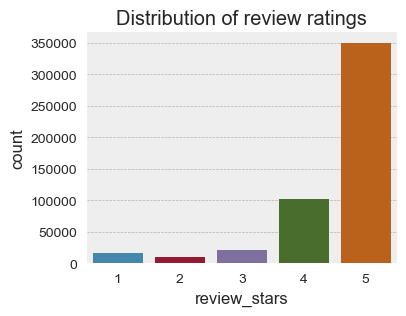

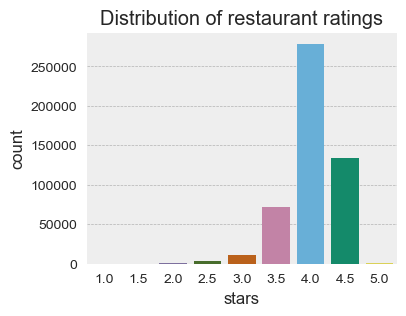

In [31]:
# Additional Visualizations
plt.figure(figsize=(4,3))
ax = sns.countplot(data = sample, x = 'review_stars')
plt.title('Distribution of review ratings')

plt.figure(figsize=(4,3))
ax = sns.countplot(data = sample, x = 'stars')
plt.title('Distribution of restaurant ratings')

## Auxilary ##

In [32]:
# Create separate dataset for weather scraping
df_coordinates = sample[['latitude', 'longitude', 'date']]
df_coordinates.shape

(500000, 3)

In [33]:
# Check the dataset
df_coordinates.head(10)

,latitude,longitude,date
689716,29.935642,-90.104124,2021-04-25 16:02:59
3281627,29.950000,-90.066831,2011-09-15 01:37:03
2888450,34.423983,-119.705860,2012-10-01 05:34:00
77509,39.937765,-75.158324,2021-07-11 16:56:59
1032404,38.608730,-90.208952,2015-08-26 23:55:23
3044294,29.921138,-90.099559,2015-05-22 23:10:36
2205693,39.941596,-75.147810,2013-10-23 11:31:53
45709,28.013936,-82.789512,2019-06-30 22:54:01
1072144,39.951576,-75.159668,2019-10-22 17:01:06
2805627,30.003437,-90.179202,2014-04-10 23:57:43


In [ ]:
# Load into CSV files
csv_name = "yelp_coordinates.csv"
df_coordinates.to_csv(csv_name, index=False)

csv_name = "yelp_reviews_restaurants.csv"
sample.to_csv(csv_name, index=False)